<a href="https://colab.research.google.com/github/YashM246/Heart_Stroke_Detection_Using_ML-/blob/main/Heart_Stroke_Detechtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Importing Dataset into Google Collab

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['stroke_dataset.csv']))
df.head()

Saving stroke_dataset.csv to stroke_dataset.csv


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# 2) Data Exploration and Visualization and Preprocessing

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
df = df.drop(['id'],axis='columns')
print(df['gender'].unique())

['Male' 'Female' 'Other']


Number of Unique Values for Work Type - 5<br>
Number of Unique Values for Residence Type - 2<br>
Number of Unique Values for Smoking Status - 4<br>

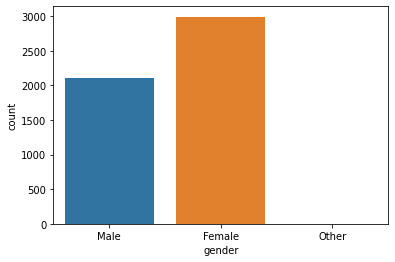

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn

sn.countplot(data=df, x='gender')

## Plot to check how/if gender affects Stroke

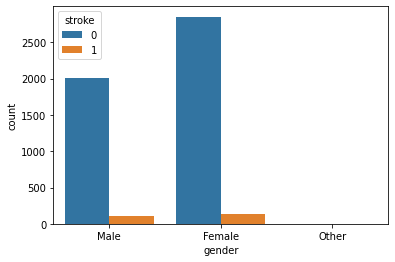

In [ ]:
sn.countplot(data=df,x='gender',hue='stroke')

## Plot to check correlation of Age and Stroke

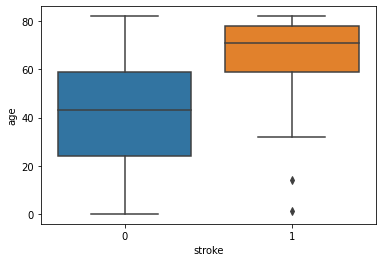

In [ ]:
sn.boxplot(data=df,x='stroke',y='age')

## Plot to check correlation of Hypertension and Stroke

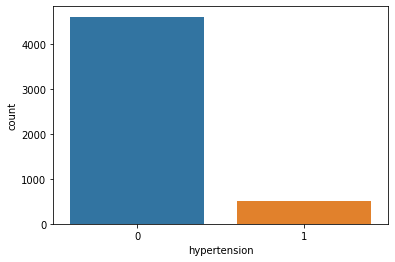

In [ ]:
sn.countplot(data=df,x='hypertension')

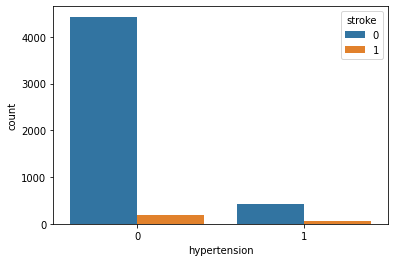

In [ ]:
sn.countplot(data=df,x='hypertension',hue='stroke')

## Plot to check correlation of Heart Disease and Stroke

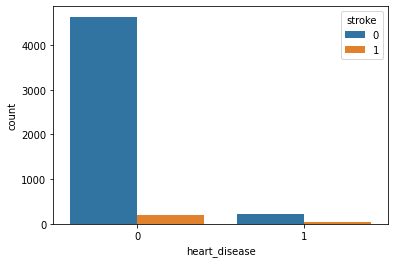

In [ ]:
sn.countplot(data=df,x='heart_disease',hue='stroke')

## Plot to check correlation of Marriage and Stroke

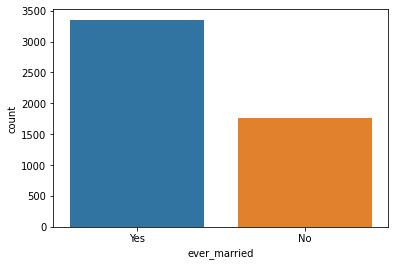

In [ ]:
sn.countplot(data=df,x='ever_married')

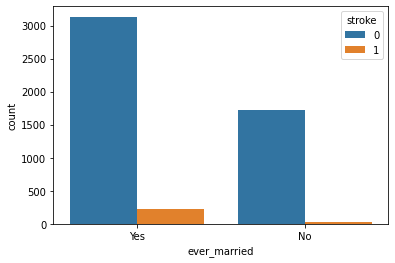

In [ ]:
sn.countplot(data=df,x='ever_married', hue='stroke')

## Plot to check correlation of Work Type and Stroke

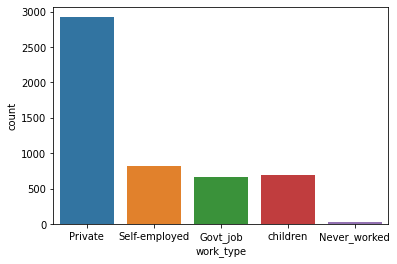

In [ ]:
sn.countplot(data=df, x='work_type')

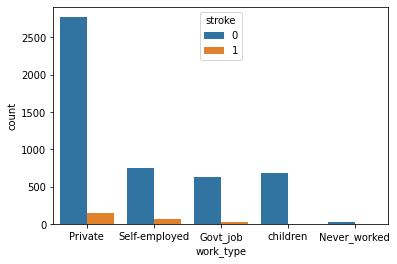

In [ ]:
sn.countplot(data=df, x='work_type', hue='stroke')

## Plot to check correlation of Residence Type and Stroke

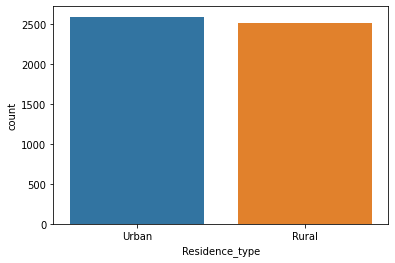

In [ ]:
sn.countplot(data=df, x='Residence_type')

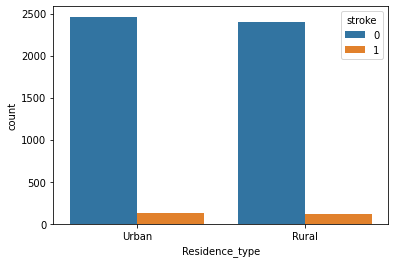

In [ ]:
sn.countplot(data=df, x='Residence_type', hue='stroke')

## Plot to check correlation of Average Glucose Level and Stroke

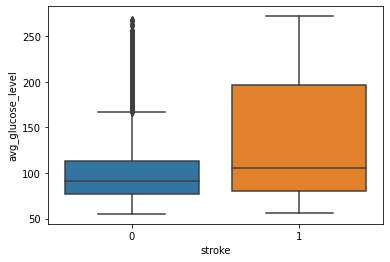

In [ ]:
sn.boxplot(data=df, x='stroke', y='avg_glucose_level')

## Plot to check correlation of BMI and Stroke

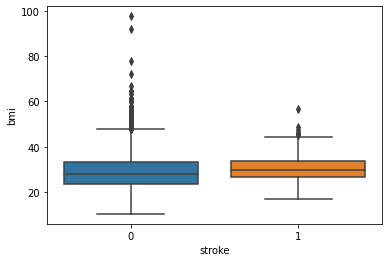

In [ ]:
sn.boxplot(data=df, x='stroke', y='bmi')

## Plot to check correlation of Smoking Status and Stroke

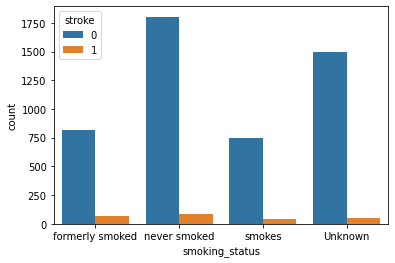

In [ ]:
sn.countplot(data=df, x='smoking_status', hue='stroke')

# 3) Results -<br/>

• From observation of graphs including gender, we understand that the dataset might be imbalanced. <br/>
<br/>
• Age might be a crucial factor affecting stroke. Since we can see that strokes are most common in ages 60 and above. Although some outliers are present.<br/><br/>
• We have very little data present on people with hypertension. Therefore, we cannot find a clear correlation<br/><br/>
• In the graph, we see people with and without heart disease both get heart strokes. Hence we can say that Heart Disease has little to no effect on Stroke<br><br>
• Married people have a higher stroke rate<br><br>
• People in the private sector have a higher rate of stroke. While people who have never worked have no risk of stroke.<br><br>
• Values in Residence Type are almost same and hence we can say it has no effect on Rate of Stroke. We can discard it.<br><br>
• Rate of Stroke is higher in people with an average glucose level of more than a 100. Although there a lot of outliers present, they may be genuine records and cannot be ignored<br><br>
• There is no specific correlation seen between BMI and Stroke<br><br>
• As per the dataset, there is no specific correlation seen between Smoking and Stroke<br><br>

# 4) Using Label Encoder to convert to Numeric Values

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

cols = df.select_dtypes(include=['object']).columns
df[cols]=df[cols].apply(LE.fit_transform)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


# 5) Heatmap for Correlation of Attributes with Stroke

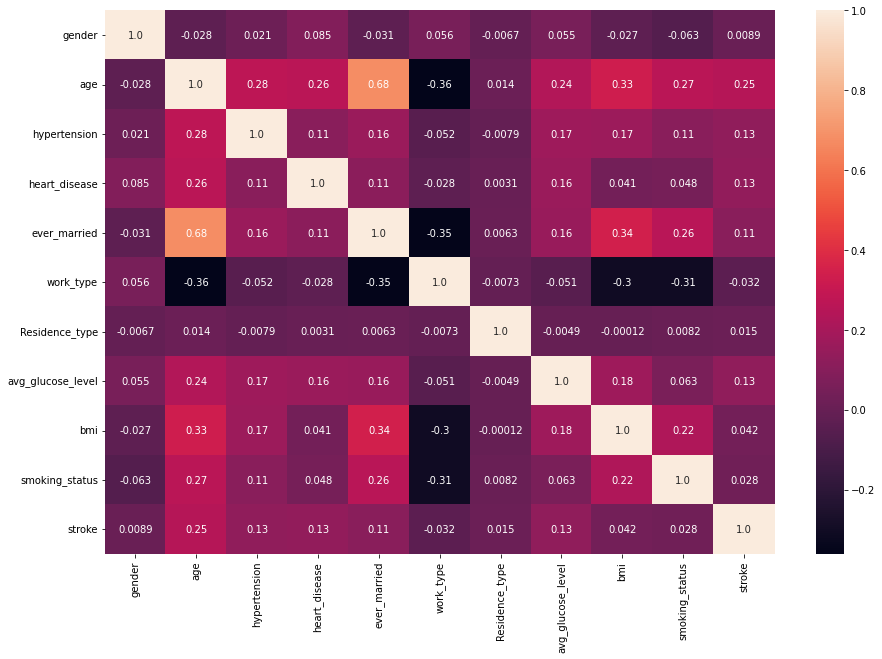

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sn.heatmap(corr,annot=True,fmt='.2')

## Observations -
<br><br>
Variables that are showing some effective correlation are-<br>
• Age<br>
• Hypertension<br>
• Heart Disease<br>
• Marriage Status<br>
• Glucose Level<br>

## 6) Filling NAN values with mean

In [ ]:
df.bmi = df.bmi.fillna(df.bmi.mean())
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


# 7) Splitting Dataset into Testing and Training Set

In [ ]:
inputs = df[['age','hypertension','heart_disease','ever_married','avg_glucose_level']]
target = df['stroke']

inputs.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level
0,67.0,0,1,1,228.69
1,61.0,0,0,1,202.21
2,80.0,0,1,1,105.92
3,49.0,0,0,1,171.23
4,79.0,1,0,1,174.12


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.25, random_state=40)

In [ ]:
len(x_train)

3832

In [ ]:
len(x_test)

1278

In [ ]:
len(inputs)

5110

# 8) Training Models and Comparing  Score

## 8.1) Linear Regression Model

In [ ]:
from sklearn import linear_model

LM = linear_model.LinearRegression()
LM.fit(x_train, y_train)

LinearRegression()

In [ ]:
LM.coef_

array([ 0.00280681,  0.03196146,  0.05923523, -0.05364946,  0.00033395])

In [ ]:
LM.intercept_

-0.07807136935868447

In [ ]:
LM.score(x_test, y_test)

0.04810319634530802

As we can see Linear Regression Model performs very poorly and hence cannot be used for Heart Stroke Prediction<br><br>
## 8.2) Naive Bayes Model<br>
<br> Since we found in Data Exploration that the features are independent of each other, we can use Naive Bayes Model to predict the target variable. We will use both Gaussian Naive Bayes and Multinomial Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

GNB = GaussianNB()
MNB = MultinomialNB()

GNB.fit(x_train, y_train)
MNB.fit(x_train, y_train)

MultinomialNB()

In [ ]:
GNB.score(x_test, y_test)

0.8716744913928013

In [ ]:
MNB.score(x_test, y_test)

0.7683881064162754

As we can see, Gaussian Naive Bayes performs poorly as well. But Multinomial Naive Bayes gives us better results.<br><br>
## 8.3) Decision Tree<br>

In [ ]:
from sklearn import tree

DT = tree.DecisionTreeClassifier()

DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
DT.score(x_test, y_test)

0.9123630672926447

## 8.4) Support Vector Machine<br>

In [ ]:
from sklearn.svm import SVC

sv = SVC()

sv.fit(x_train, y_train)

SVC()

In [ ]:
sv.score(x_test, y_test)

0.9546165884194053

## 8.5) Random Forest Classifier<br>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

RFC.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
RFC.score(x_test, y_test)

0.9405320813771518

## 8.6) XGB Classifier<br>

In [ ]:
from xgboost import XGBClassifier

xgc = XGBClassifier()
xgc.fit(inputs, target)

XGBClassifier()

In [ ]:
xgc.score(x_test, y_test)

0.9546165884194053

### We have found 2 Classifiers with the best Scores. Now we will start trying to increase the score of these models and choose one with the best score.<br><br>
# 9) Increasing Score of Models<br><br>

### Since different values of training set and testing give us different scores, we will use cross_val_score to find best average score. 

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(), inputs, target)

array([0.95107632, 0.95107632, 0.95107632, 0.95107632, 0.95205479])

In [ ]:
cross_val_score(RandomForestClassifier(), inputs, target)

array([0.93639922, 0.94227006, 0.93444227, 0.94129159, 0.93444227])

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=500), inputs, target)

array([0.93737769, 0.94227006, 0.93444227, 0.94031311, 0.9334638 ])

In [ ]:
xgc2 = XGBClassifier(objective='binary:logistic',n_estimators=100000,max_depth=5,learning_rate=0.001,n_jobs=-1)

xgc2.fit(inputs, target)
xgc2.score(x_test, y_test)

0.985133020344288

In [ ]:
cross_val_score(XGBClassifier(objective='binary:logistic',n_estimators=100000, max_depth=5,learning_rate=0.001,n_jobs=-1), inputs, target)

array([0.92759295, 0.94716243, 0.9334638 , 0.93933464, 0.94520548])

<br>

# 10) Hyper Parameter Tuning <br>
### Using Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm': {
        'model' : SVC(gamma='auto'),
        'params': {
            'C' : [1, 10, 20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model' : RandomForestClassifier(),
        'params': {
            'n_estimators':[150, 200, 300, 500]
        }
    },
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(inputs, target)

  scores.append({
      'model': model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })

KeyboardInterrupt: ignored

In [ ]:
df2 = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df2

NameError: ignored

### Using RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(RandomForestClassifier(),{
    'max_depth':[2, 3, 5, 8],                                     # Defines the longest path allowed between root node and leaf node
    'n_estimators':[100, 150, 200, 300],                          # Number of Trees
    'max_samples':[0.1, 0.2, 0.3]                                 # Fraction of Original Dataset to be given to each tree
    },
      cv=5,
      return_train_score=False,
      n_iter=10
    )

In [ ]:
rs.fit(inputs, target)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 5, 8],
                                        'max_samples': [0.1, 0.2, 0.3],
                                        'n_estimators': [100, 150, 200, 300]})

In [ ]:
pd.DataFrame(rs.cv_results_)[['param_max_depth','param_n_estimators','param_max_samples','mean_test_score']]

,param_max_depth,param_n_estimators,param_max_samples,mean_test_score
0,2,150,0.1,0.951272
1,2,200,0.2,0.951272
2,2,200,0.1,0.951272
3,5,200,0.2,0.951272
4,3,300,0.3,0.951272
5,2,300,0.3,0.951272
6,5,150,0.2,0.951272
7,2,100,0.1,0.951272
8,8,300,0.3,0.951272
9,3,300,0.1,0.951272


# 9) Final Model<br>
• The model with best score is chosen which is the XGB Classifier in this case.<br>

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = xgc2.predict(x_test)

mean_squared_error(y_test, y_pred)

0.01486697965571205

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.656840022611645

Text(42.0, 0.5, 'Actual')

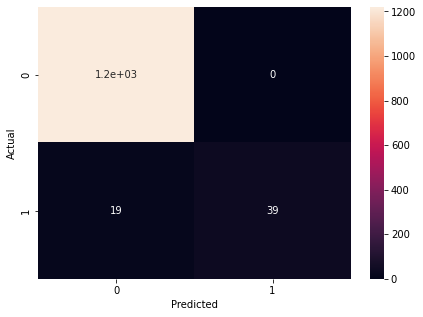

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel("Actual")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

NameError: ignored